In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers, regularizers

Using TensorFlow backend.


In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

In [4]:
np.random.seed(7)

In [5]:
from keras import backend as K

def reg(weight_matrix):
    return 0.01 * K.sum(K.abs(weight_matrix))

In [6]:
data = datasets.load_breast_cancer()

In [7]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data.data, data.target, test_size = 0.33, random_state = 7)

In [8]:
x_train.shape

(381, 30)

In [9]:
number_of_features = x_train.shape[1]
output_size = 1

In [10]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
model = Sequential()
model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=output_size, kernel_regularizer=reg, activation='sigmoid'))

model.compile(optimizer='sgd', loss=losses.binary_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs= 30, batch_size=16, verbose=0, validation_split=0.3)

W0909 23:35:17.159380  2232 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0909 23:35:18.050431  2232 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0909 23:35:18.326447  2232 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0909 23:35:18.719469  2232 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0909 23:35:18.809475  2232 deprecation_wrapper.py:119] From C:\ProgramData\Anac

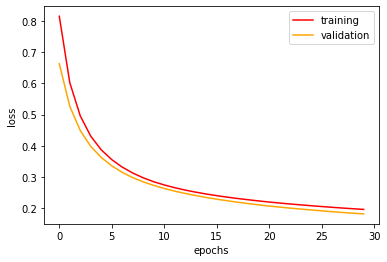

In [12]:
epochs = history.epoch
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

In [13]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

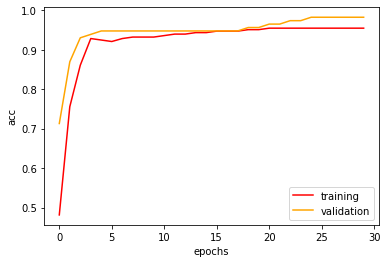

In [14]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

188/188 [==============================] - 0s 128us/step
Test loss: 0.20312686549856307, test accuracy: 0.9574468085106383
